In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers



model = models.Sequential()
#model.add(Embedding(y_train.shape[0], 32))

model.add(layers.Conv2D(64, kernel_size = (3, 3),  padding = 'same',activation = 'relu', input_shape = (128,128,1)))
model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model.add(layers.Conv2D(64, kernel_size = (3, 3),  padding = 'same',activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model.add(layers.Conv2D(128, kernel_size = (3, 3),  padding = 'same', activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'))
model.add(layers.Conv2D(128, kernel_size = (3, 3),  padding = 'same',activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2), padding = 'same'))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dense(45, activation = 'softmax'))

In [4]:
model.load_weights('weights/weights_cnn.h5')

In [ ]:
import os 
from PIL import Image
import numpy as np


margin = 32
img = Image.open("img.jpg").convert('L')

step = 10

img_seg = []

for x in range(margin, img.size[0]-margin, step):
    img_line = []

    for y in range(margin, img.size[1]-margin, step):
        area = [y-margin, x-margin, y+margin, x+margin]
        img_cropped = img.crop(area)
        img_cropped = img_cropped.resize((128,128),Image.Resampling.LANCZOS)
        img_cropped = np.asarray(img_cropped)
        img_line.append(img_cropped)
    img_seg.append(img_line)
img_seg = np.asarray(img_seg)
img_seg = img_seg.astype('float16') / 255
img_seg.shape


(102, 99, 128, 128, 3)

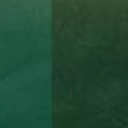

In [ ]:
Image.fromarray((img_seg[30,30]*255).astype('uint8'))

In [ ]:
dir = "NWPU-RESISC45"
lables = os.listdir(dir)

In [ ]:
img_seg_f = np.reshape(img_seg, (img_seg.shape[0]*img_seg.shape[1], 128,128), order='C')

In [ ]:
def preds(imgs):
    predictions = model.predict(imgs)
    pred_inds = [np.where(prediction == prediction.max()) for prediction in predictions]
    return pred_inds

pred_inds = np.asarray(preds(img_seg_f))



316/316 [==============================] - 21s 45ms/step


In [ ]:
pred_inds = np.reshape(pred_inds, (img_seg.shape[0], img_seg.shape[1]))
pred_inds.shape

(102, 99)

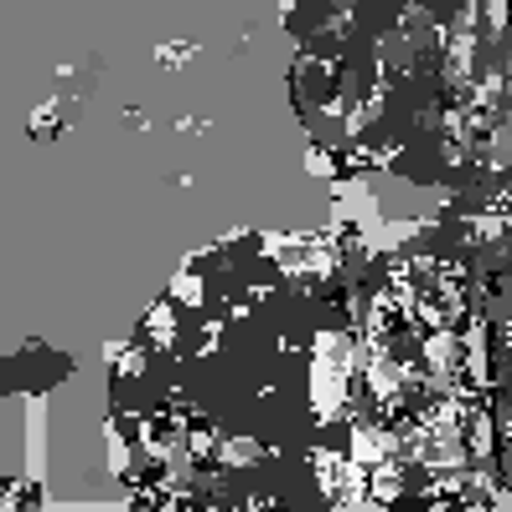

In [ ]:
image = Image.fromarray((pred_inds*(255/45)).astype(np.uint8))
image = image.resize((512,512))
image

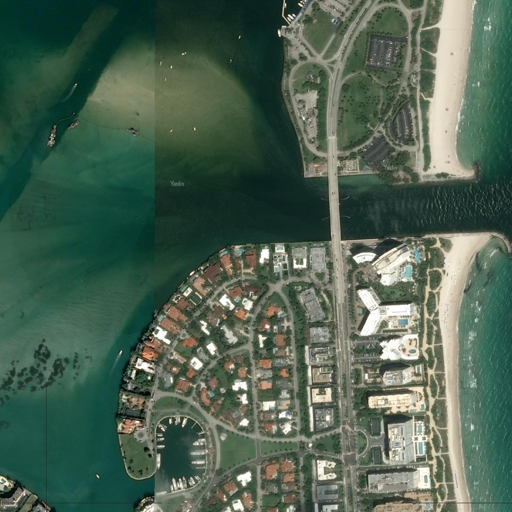

In [ ]:
image = Image.open("img.jpg")
image = image.resize((512,512))
image